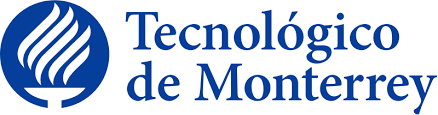

# **Maestría en Inteligencia Artificial Aplicada**

## **Materia: Operaciones de aprendizaje automático**

### **Profesor Titular: Dr. Gerardo Rodríguez Hernández**
### **Profesor Titular: Maestro Ricardo Valdez Hernández**
### **Profesora Tutora: Maestra María Mylen Treviño Elizondo**

## **Fase 1 - Avance de Proyecto**

### **Equipo 34:**

### **A01794545 - Alejandro Emmanuel Silva Ortega**
### **A01795371 - Ivan Alejandro Pedraza Macias**
### **A01793918** - **Helmy Andrea Moreno Navarro**
### **A0**
### **A0**

### **Fecha de entrega: 6 de octubre de 2024**

In [1]:
# !pip install ucimlrepo 
#libreria necesaria para importar paquetes de uimlrepo 

# **Librerías**

In [15]:
import os
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

import yaml

# **1.Manipulación y preparación de datos**

**Tarea:**
Realizar tareas de manipulación y preparación de datos utilizando herramientas y bibliotecas específicas.

**Instrucciones:**

- Importar los conjuntos de datos con los que se trabajará.
- Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.
- Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.

**Importancia:** Esta fase es crucial para asegurar que los datos estén en un formato adecuado y limpio, lo que es esencial para la construcción de modelos precisos y fiables.

 

#### **1.1 Importar los conjuntos de datos con los que se trabajará.**

In [5]:
# fetch dataset 
cervical_cancer_behavior_risk = fetch_ucirepo(id=537) 
  
# data (as pandas dataframes) 
X = cervical_cancer_behavior_risk.data.features 
y = cervical_cancer_behavior_risk.data.targets 
  
print('Dimension de X:',X.shape)
print('Dimension de y:',y.shape)

# Concatenamos ambos datasets (feature y target)
cervical_data = pd.concat([X, y], axis = 1)
print('Dimension final:',cervical_data.shape)
cervical_data.head()

Dimension de X: (72, 19)
Dimension de y: (72, 1)
Dimension final: (72, 20)


,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk,ca_cervix
0,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,10,1
1,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,10,1
2,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,10,1
3,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,10,1
4,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,8,1


#### **1.2 Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.**

In [10]:
print('Resumen de dataframe:')
cervical_data.info()

Resumen de dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_eating             72 non-null     int64
 1   behavior_personalHygiene    72 non-null     int64
 2   intention_aggregation       72 non-null     int64
 3   intention_commitment        72 non-null     int64
 4   attitude_consistency        72 non-null     int64
 5   attitude_spontaneity        72 non-null     int64
 6   norm_significantPerson      72 non-null     int64
 7   norm_fulfillment            72 non-null     int64
 8   perception_vulnerability    72 non-null     int64
 9   perception_severity         72 non-null     int64
 10  motivation_strength         72 non-null     int64
 11  motivation_willingness      72 non-null     int64
 12  socialSupport_emotionality  72 non-null     int64
 13  socialSupport_appreciation  72 non-null     i

#### **Nota: El dataset no cuenta com valores nulos en ninguna de las columnas**

#### **1.3 Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.**

In [13]:
cervical_data.describe()

,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,9.666667,0.291667
std,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,1.186782,0.457719
min,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000
25%,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,10.000000,0.000000
50%,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,10.000000,0.000000
75%,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,10.000000,1.000000
max,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,10.000000,1.000000


In [ ]:
# metadata 
# print(cervical_cancer_behavior_risk.metadata) 
  
# # variable information 
# print(cervical_cancer_behavior_risk.variables) 

# **2.Exploración y preprocesamiento de datos**

**Tarea:** Explorar y preprocesar los datos para identificar patrones, tendencias y relaciones significativas.

**Instrucciones:**

- Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.
- Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.

**Importancia:** La exploración y el preprocesamiento permiten comprender mejor los datos y preparar un conjunto de datos optimizado para el modelado, mejorando así la calidad de los resultados.

#### **2.1 Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.**

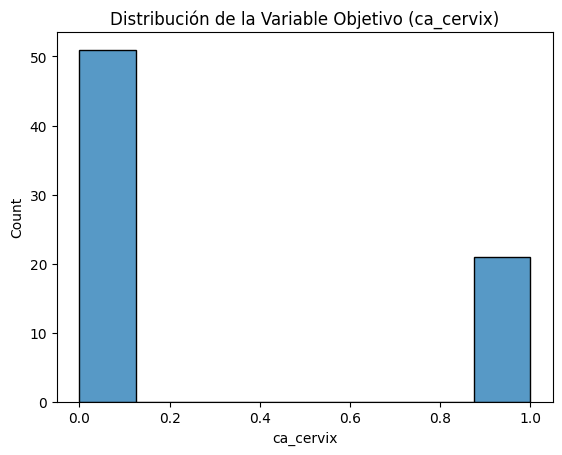

In [18]:
sns.histplot(cervical_data['ca_cervix'])
plt.title('Distribución de la Variable Objetivo (ca_cervix)')
plt.show()

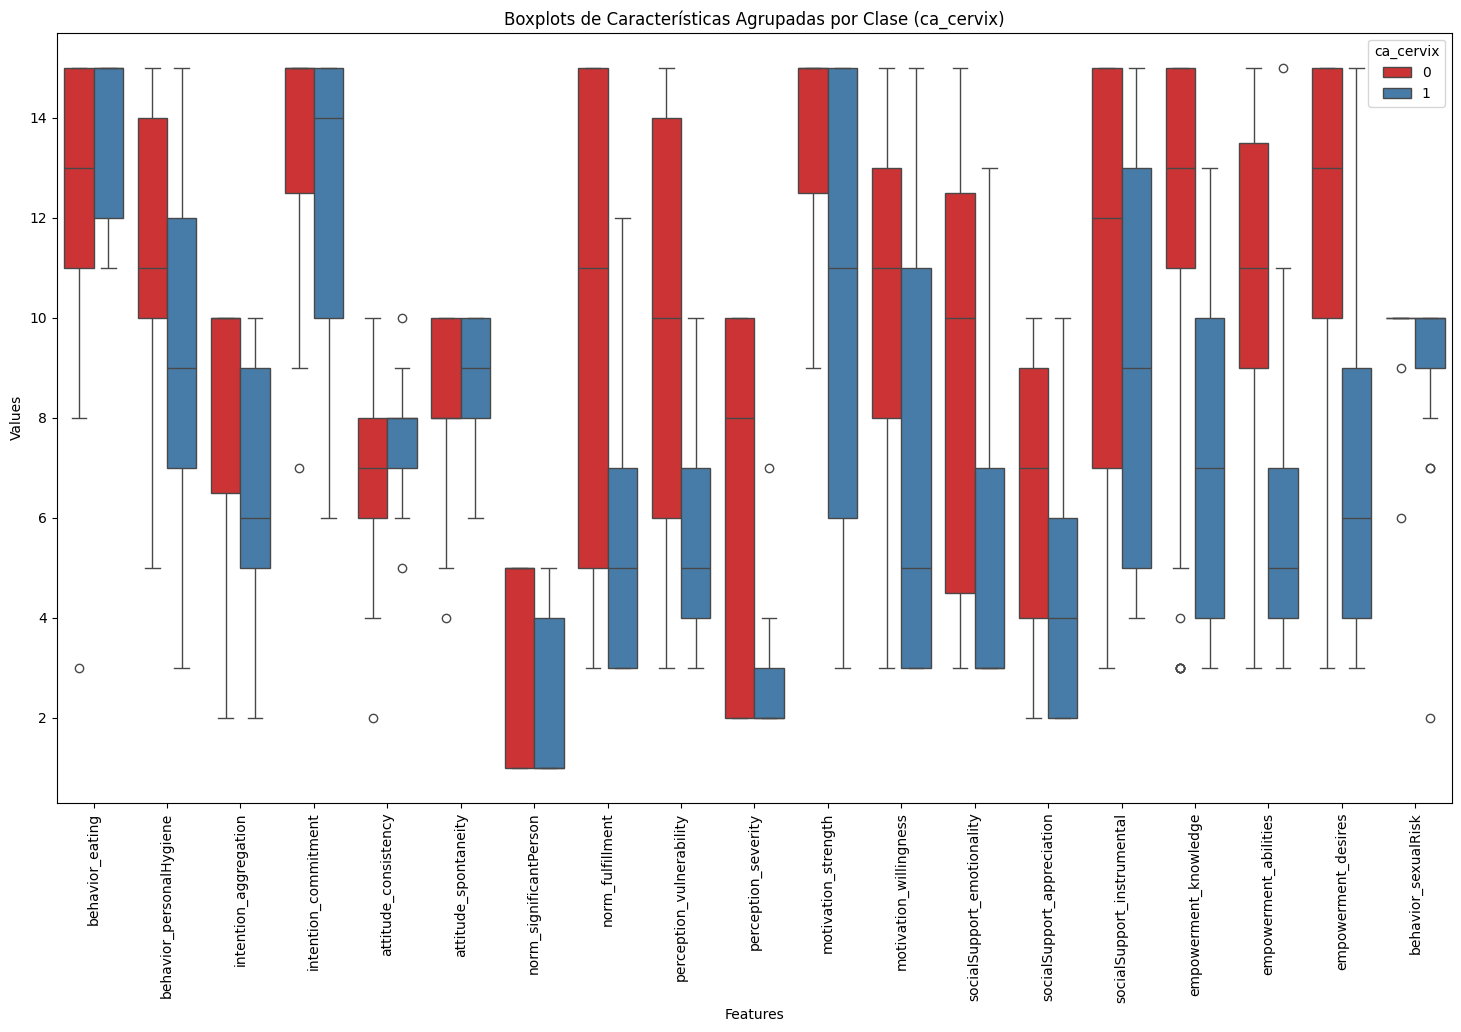

In [22]:
# Boxplot para ver cómo varían las características según la clase objetivo
plt.figure(figsize=(18, 10))
df_melted = pd.melt(cervical_data, id_vars='ca_cervix', var_name='Features', value_name='Values')
sns.boxplot(x='Features', y='Values', hue='ca_cervix', data=df_melted, palette='Set1')
plt.xticks(rotation=90)
plt.title('Boxplots de Características Agrupadas por Clase (ca_cervix)')
plt.show()

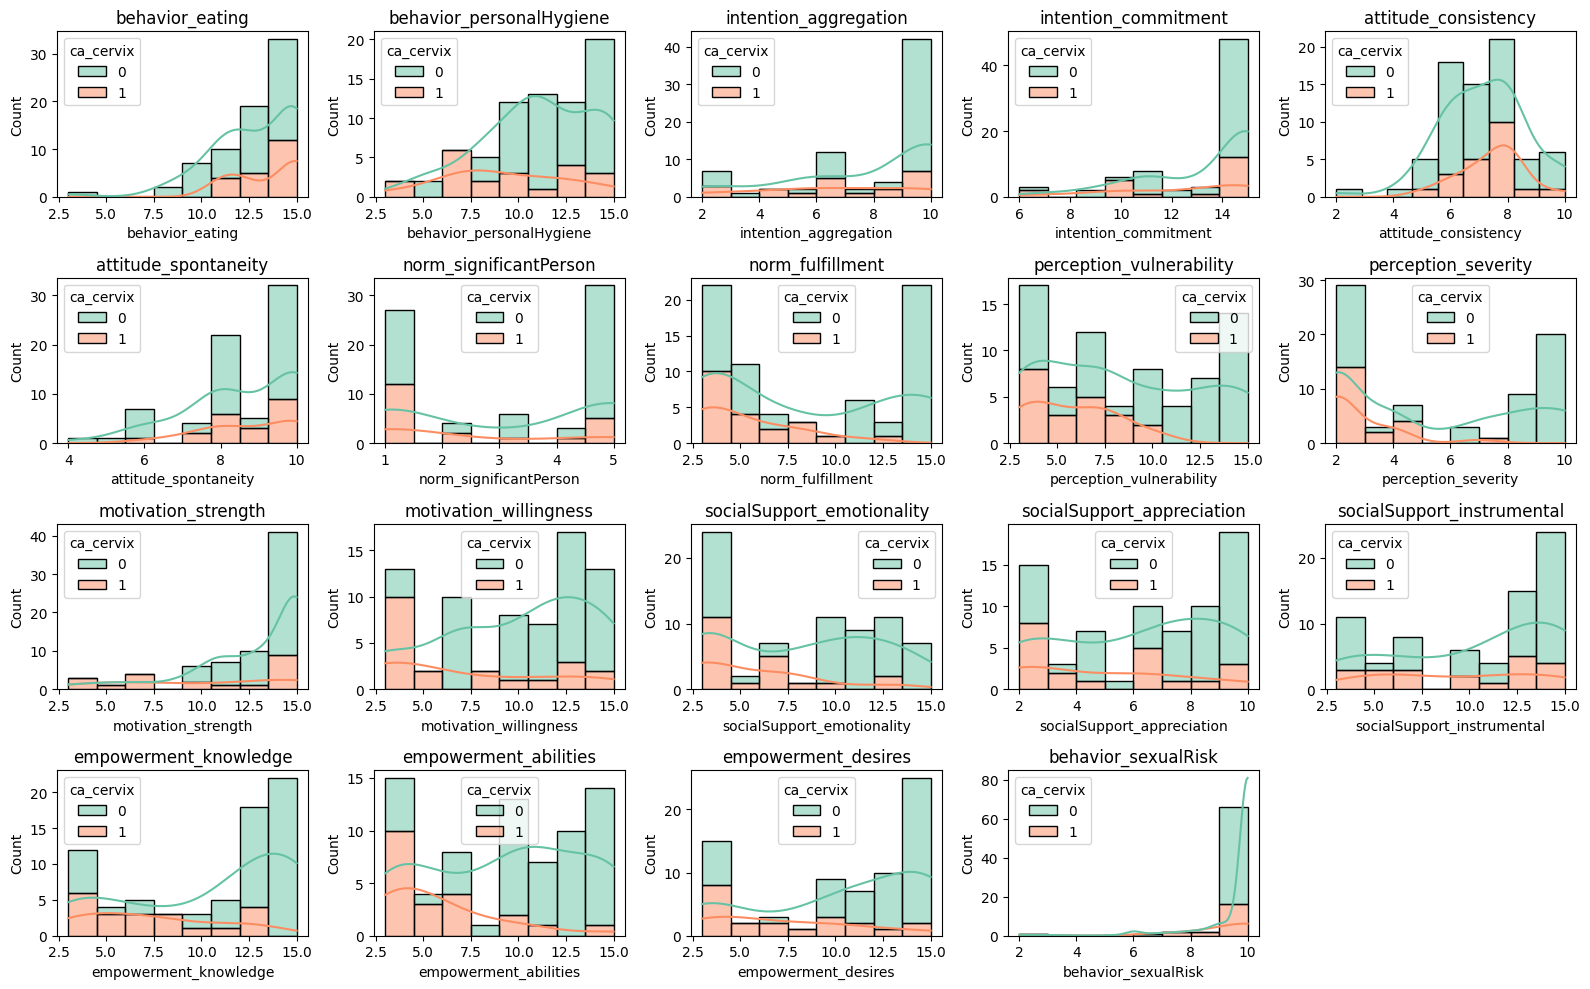

In [23]:
# Histogramas de las características por clase de la variable objetivo
plt.figure(figsize=(16, 10))
for i, column in enumerate(cervical_data.columns[:-1]):
    plt.subplot(4, 5, i+1)
    sns.histplot(data=cervical_data, x=column, hue='ca_cervix', multiple='stack', kde=True, palette='Set2')
    plt.title(column)
    plt.tight_layout()

plt.show()

In [24]:
cervical_data.skew()

behavior_eating              -1.288417
behavior_personalHygiene     -0.495665
intention_aggregation        -1.025822
intention_commitment         -1.323381
attitude_consistency         -0.314268
attitude_spontaneity         -0.854840
norm_significantPerson       -0.119447
norm_fulfillment              0.200643
perception_vulnerability      0.224658
perception_severity           0.270296
motivation_strength          -1.467241
motivation_willingness       -0.387659
socialSupport_emotionality    0.054630
socialSupport_appreciation   -0.209869
socialSupport_instrumental   -0.515717
empowerment_knowledge        -0.607618
empowerment_abilities        -0.142479
empowerment_desires          -0.542501
behavior_sexualRisk          -4.726348
ca_cervix                     0.936319
dtype: float64

# **3.Versionado de datos**

**Tarea:** Aplicar técnicas de versionado de datos para asegurar reproducibilidad y trazabilidad.

**Instrucciones:**

- Utilizar herramientas de versionado de datos para mantener un registro de cambios y versiones de los conjuntos de datos utilizados.
- Documentar todas las modificaciones realizadas en los datos.

**Importancia:** El versionado de datos es esencial para la reproducibilidad de los experimentos y para mantener un historial detallado del manejo de los datos.

# **4.Construcción, ajuste y evaluación de Modelos de Machine Learning**

**Tarea:** Construir, ajustar y evaluar modelos de Machine Learning utilizando técnicas y algoritmos apropiados.

**Instrucciones:**

- Seleccionar algoritmos de Machine Learning adecuados para resolver el problema planteado.
- Entrenar los modelos utilizando los datos preprocesados.
- Realizar ajustes de hiperparámetros para optimizar el rendimiento del modelo.
- Evaluar los modelos utilizando métricas de rendimiento específicas.

**Importancia:** Esta etapa es fundamental para desarrollar modelos precisos y eficientes que puedan resolver problemas específicos de manera efectiva.

# **5.Aplicación de Mejores Prácticas en el Pipeline de Modelado**

**Tarea:** Aplicar mejores prácticas en cada etapa del pipeline de modelado.

**Instrucciones:**

- Implementar pipelines de Machine Learning en donde se automaticen las tareas de preprocesamiento, entrenamiento y evaluación.
- Documentar cada paso del pipeline para asegurar claridad y reproducibilidad.

**Importancia:** Las mejores prácticas garantizan que el proceso de modelado sea eficiente, reproducible y escalable.

# **6.Estructuración y Refactorización del Código**

**Tarea:** Estructurar modelos de Machine Learning de manera organizada y aplicar principios de programación orientada a objetos.

**Instrucciones:**

- Organizar el código en módulos y funciones bien definidas.
- Aplicar principios de programación orientada a objetos para mejorar la estructura del código.
- Refactorizar el código existente para mejorar su eficiencia y mantenibilidad.

**Importancia:** Una buena estructuración y refactorización del código es esencial para el mantenimiento a largo plazo y la escalabilidad de los proyectos de Machine Learning.